In [2]:
%matplotlib inline

import numpy as np

import Utilities.nctools as nctools
import Utilities.metutils as metutils
from Utilities.maputils import find_index

from PlotInterface.curves import HazardCurve
import seaborn

# Set the context: `paper`, `notebook`, `talk` or `poster`
seaborn.set_context("poster")


In [3]:
class PlotUnits(object):

    def __init__(self, units):
        labels = {
            'mps': 'm/s',
            'mph': 'mi/h',
            'kts': 'kts',
            'kph': 'km/h',
            'kmh': 'km/h'
        }

        levels = {
            'mps': np.arange(30, 101., 5.),
            'mph': np.arange(80, 221., 10.),
            'kts': np.arange(60, 201., 10.),
            'kph': np.arange(80, 361., 20.),
            'kmh': np.arange(80, 361., 20.)
        }

        self.units = units
        self.label = labels[units]
        self.levels = levels[units]

In [4]:
plotUnits = PlotUnits('mps')

url = "/g/data/fj6/TCRM/benchmark/hazard/hazard.nc"

ncobj = nctools.ncLoadFile(url)
lon = nctools.ncGetDims(ncobj, 'lon')
lat = nctools.ncGetDims(ncobj, 'lat')
years = nctools.ncGetDims(ncobj, 'return_period')

wspd = nctools.ncGetVar(ncobj, 'wspd')
try:
    wLower  = nctools.ncGetVar(ncobj, 'wspdlower')
    wUpper = nctools.ncGetVar(ncobj, 'wspdupper')
    ciBounds = True
except KeyError:
    ciBounds = False

minLon = min(lon)
maxLon = max(lon)
minLat = min(lat)
maxLat = max(lat)

defaultMax = np.ceil(metutils.convert(100.0, 'mps', plotUnits.units)/10.0)*10.0

plat, plon = [-20.5, 148.5]

i = find_index(lon, plon)
j = find_index(lat, plat)


xlabel = 'Average recurrence interval (years)'
ylabel = 'Wind speed ({0})'.format(plotUnits.label)
title = "Return period wind speed at ({0:.2f},{1:.2f})".format(plon, plat)

pWspd = metutils.convert(wspd[:, j, i], 'mps', plotUnits.units)
if ciBounds:
    pWspdLower = metutils.convert(wLower[:,j,i], 'mps', plotUnits.units)
    pWspdUpper  = metutils.convert(wUpper[:,j,i], 'mps', plotUnits.units)
    

/apps/matplotlib/1.5.1-py2.7/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/tight_layout.py:222: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


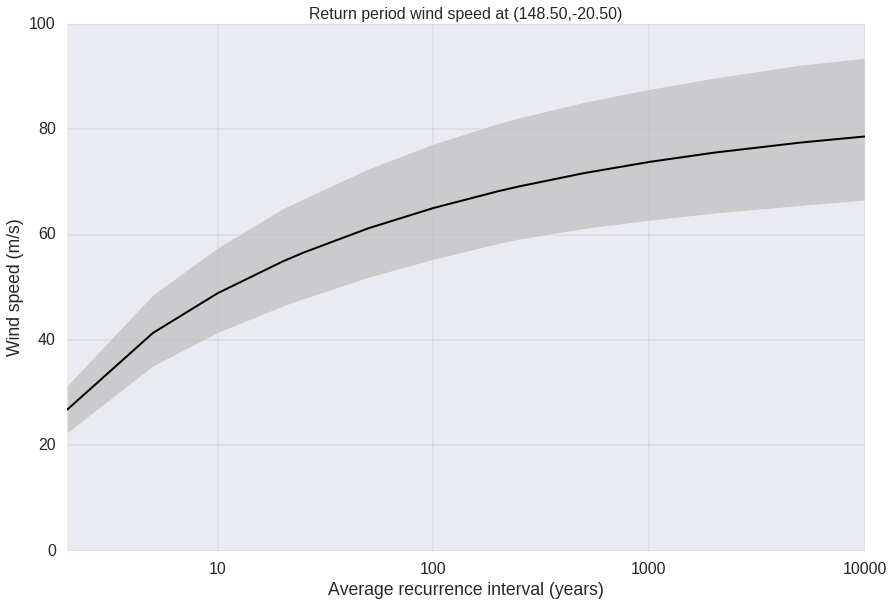

In [5]:
fig = HazardCurve()
fig.plot(years, pWspd, pWspdUpper, pWspdLower, xlabel, ylabel, title)
fig